In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Code:
olympics_df = pd.read_excel('/Users/joshuakong/Documents/DS_Projects/olympics_medal_predictor/data/Olympics Data Set take home.xlsx')


In [3]:
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
olympics_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
olympics_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [6]:
olympics_df.columns = [column.lower() for column in olympics_df.columns]

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

In [7]:
olympics_df['gold'] = [1 if medal == 'Gold' else 0 for medal in olympics_df['medal']]
olympics_df['silver'] = [1 if medal == 'Silver' else 0 for medal in olympics_df['medal']]
olympics_df['bronze'] = [1 if medal == 'Bronze' else 0 for medal in olympics_df['medal']]
olympics_df['no_medal'] = [1 if medal == 'No' else 0 for medal in olympics_df['medal']]

In [8]:
olympics_df[(olympics_df['medal'] == 'Bronze')][['medal','bronze']]

,medal,bronze
37,Bronze,1
38,Bronze,1
40,Bronze,1
41,Bronze,1
50,Bronze,1
...,...,...
271032,Bronze,1
271048,Bronze,1
271080,Bronze,1
271082,Bronze,1


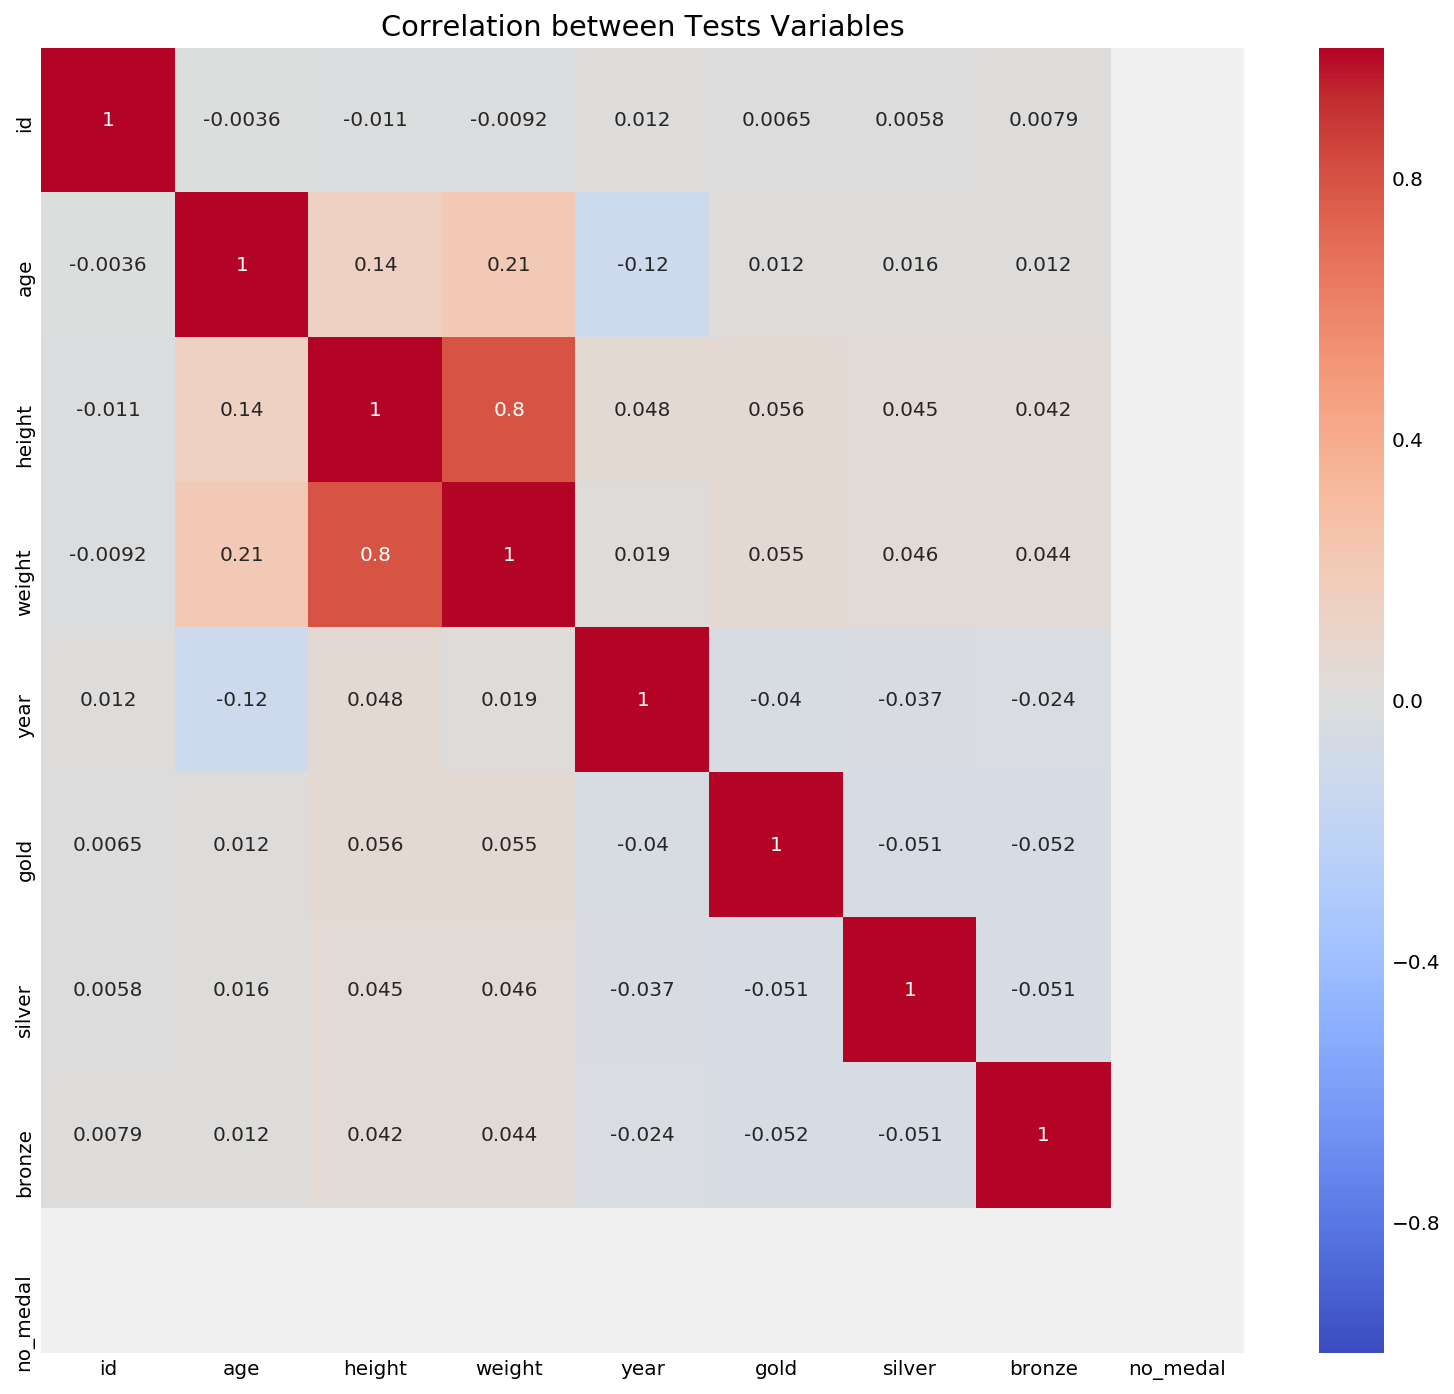

In [9]:
plt.figure(figsize=(12, 12))
sns.heatmap(olympics_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Tests Variables');

In [10]:
olympics_df.isnull().sum()

id               0
name             0
sex              0
age           9474
height       60171
weight       62875
team             0
noc              0
games            0
year             0
season           0
city             0
sport            0
event            0
medal       231333
gold             0
silver           0
bronze           0
no_medal         0
dtype: int64

In [11]:
olympics_df.shape

(271116, 19)

In [12]:
olympics_df['medal'].replace(np.NaN, 'No', inplace=True)

In [13]:
olympics_df['age'].replace(np.NaN, olympics_df['age'].mean(), inplace=True)
olympics_df['height'].replace(np.NaN, olympics_df['height'].mean(), inplace=True)
olympics_df['weight'].replace(np.NaN, olympics_df['weight'].mean(), inplace=True)

In [14]:
olympics_df.columns

Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal', 'gold', 'silver',
       'bronze', 'no_medal'],
      dtype='object')

In [15]:
olympics_df = pd.get_dummies(olympics_df, prefix=['sex','noc','games','season','city','sport'], columns=['sex','noc','games','season','city','sport'],drop_first=True)

In [16]:
olympics_df.describe().columns

Index(['id', 'age', 'height', 'weight', 'year', 'gold', 'silver', 'bronze',
       'no_medal', 'sex_M',
       ...
       'sport_Table Tennis', 'sport_Taekwondo', 'sport_Tennis',
       'sport_Trampolining', 'sport_Triathlon', 'sport_Tug-Of-War',
       'sport_Volleyball', 'sport_Water Polo', 'sport_Weightlifting',
       'sport_Wrestling'],
      dtype='object', length=396)

In [17]:
features = list(olympics_df.describe().columns)

In [18]:
features.remove('gold')

In [19]:
X = olympics_df[features]
y = olympics_df['gold']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size= 0.33,
                                                   random_state=42)


In [20]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print(f'Logistic Regression Accuracy Score: {logreg.score(X_test, y_test)}')

Logistic Regression Accuracy Score: 0.950977433524461
